<h1>Jigsaw Unintended Bias in Toxicity Classification</h1>
You can visit the problem here:- 

https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification

The dataset for toxicity classification is provided by conversational AI. 

Following files are provided along with the Kaggle problem. 
- Train.csv - Contains various features of comments along with the comments.
- Test.csv - Contains just the comments without sub-categories. 
- Test_public_expanded.csv - Has been added later on to add sub-categories for the comments in the test dataset.
- Test_private_expanded.csv - - Has been added later on to add sub-categories for the comments in the test dataset.
- Toxicity_individual_annotations.csv - Contains toxicity rated by individual people
- Identity_individual_annoations.csv - Contains toxicity rated by individual people


#Downloading Data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/kaggle_toxic/

/content/drive/MyDrive/kaggle_toxic


In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification

 32% 5.00M/15.9M [00:00<00:00, 35.4MB/s]
100% 15.9M/15.9M [00:00<00:00, 62.9MB/s]
 32% 5.00M/15.8M [00:00<00:00, 35.9MB/s]
100% 15.8M/15.8M [00:00<00:00, 62.5MB/s]
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
 41% 5.00M/12.1M [00:00<00:00, 38.2MB/s]
100% 12.1M/12.1M [00:00<00:00, 59.2MB/s]
 41% 5.00M/12.3M [00:00<00:00, 46.3MB/s]
100% 12.3M/12.3M [00:00<00:00, 59.9MB/s]
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
 87% 56.0M/64.7M [00:00<00:00, 63.2MB/s]
100% 64.7M/64.7M [00:00<00:00, 91.9MB/s]
 98% 320M/326M [00:02<00:00, 125MB/s]
100% 326M/326M [00:02<00:00, 127MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('all_data.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
with zipfile.ZipFile('identity_individual_annotations.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
with zipfile.ZipFile('toxicity_individual_annotations.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
with zipfile.ZipFile('test_private_expanded.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
with zipfile.ZipFile('test_public_expanded.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
with zipfile.ZipFile('test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

#Loading Data and viewing NaN values

In [ ]:
all_data = pd.read_csv('all_data.csv')

In [ ]:
all_data.head(5)

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,0,2,0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,0,0,0,0.815789,0.065789,0.552632,0.592105,0.000000,0.684211,0.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,0,1,0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80


In [ ]:
train = all_data.loc[all_data['split']=='train']
train.head(5)

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,0,2,0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,0,1,0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
5,6290444,"Cry me a river, why don't you.\nDrinking, drug...",train,2017-11-04 22:04:11.596185+00,54,6290143.0,396946,rejected,0,0,0,0,0,0.203390,0.016949,0.050847,0.000000,0.033898,0.203390,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,59


In [ ]:
train.drop('split', axis=1, inplace=True)

In [ ]:
train = train.reset_index(drop=True)
train.head(5)

,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,0,2,0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,5410943,Tucker and Paul are both total bad ass mofo's.,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,0,1,0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
4,6290444,"Cry me a river, why don't you.\nDrinking, drug...",2017-11-04 22:04:11.596185+00,54,6290143.0,396946,rejected,0,0,0,0,0,0.203390,0.016949,0.050847,0.000000,0.033898,0.203390,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,59


In [ ]:
train.shape

(1804875, 45)

In [ ]:
train.isnull().sum()

id                                           0
comment_text                                 1
created_date                                 0
publication_id                               0
parent_id                               778646
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1399745
female                                 1399745
transgender  

In [ ]:
train['female'].value_counts()

0.000000    331440
1.000000     30189
0.833333      5915
0.800000      5382
0.166667      5099
             ...  
0.098361         1
0.008997         1
0.980769         1
0.976567         1
0.141264         1
Name: female, Length: 204, dtype: int64

NaN values are mostly in features of the comment i.e. towards which gender, color, race etc. they are directed towards. So the data is more or less does not require any imputing. 

#Data Balance

In [ ]:
toxic = []
#making comments which have probability more than 0.5 as toxic and marking them as 1 while non-toxic as 0
for i in train['toxicity']:
     if i > 0.5:
        toxic.append(1)
     else:
        toxic.append(0)

train['toxic_binary'] = toxic

In [ ]:
train['toxic_binary'].value_counts()

0    1698437
1     106438
Name: toxic_binary, dtype: int64

Text(0, 0.5, 'Frequency')

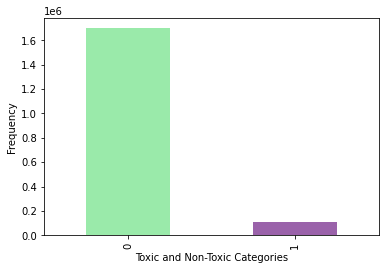

In [ ]:
data_balance = train['toxic_binary'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])
data_balance.set_xlabel('Toxic and Non-Toxic Categories')
data_balance.set_ylabel('Frequency')

Expectedly, there are more non-toxic comments than toxic comments. 

#Sub-toxic categories

In [ ]:
train['sub_toxic'] = train[['severe_toxicity','obscene','sexual_explicit', 'identity_attack','insult', 'threat']].idxmax(axis=1)

In [ ]:
sub_toxic = []
for j in range(len(train)):
   if train['toxic_binary'][j] == 1:
      if train['sub_toxic'][j] == 'severe_toxicity':
          sub_toxic.append('severe_toxicity')  
      if train['sub_toxic'][j] == 'obscene':  
          sub_toxic.append('obscene')
      if train['sub_toxic'][j] == 'sexual_explicit': 
          sub_toxic.append('sexual_explicit')
      if train['sub_toxic'][j] == 'identity_attack':     
          sub_toxic.append('identity_attack')
      if train['sub_toxic'][j] == 'insult': 
          sub_toxic.append('insult')
      if train['sub_toxic'][j] == 'threat':   
          sub_toxic.append('threat')

In [ ]:
len(sub_toxic)

106438

In [ ]:
sub = pd.DataFrame(sub_toxic)

In [ ]:
sub.value_counts().sum()

106438

In [ ]:
sub.value_counts()

insult             85059
identity_attack     8583
obscene             6627
threat              3454
sexual_explicit     2715
dtype: int64

Text(0, 0.5, 'Frequency')

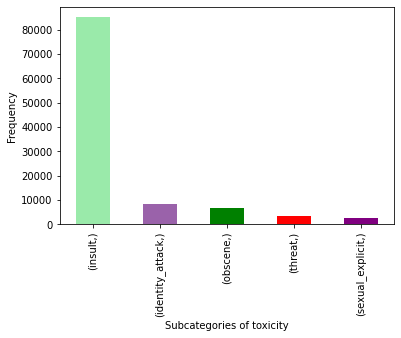

In [ ]:
sub_plot = sub.value_counts().plot.bar(color=['#9AEAAA','#9A62AA', '#008000', '#FF0000', '#800080', '#800090','#800060'])
sub_plot.set_xlabel('Subcategories of toxicity')
sub_plot.set_ylabel('Frequency')

Insult sub-category in toxic comments is clearly the highest and none of the comments have severe toxicity. Other sub-categories are more or less equally distributed. 

#Most frequent words

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

def clean(text):
  text_token = word_tokenize(text)
  filtered_text = ' '.join([w.lower() for w in text_token if w.lower() not in stop and len(w) > 2])
  filtered_text = filtered_text.replace(r"[^a-zA-Z]+", '')
  text_only = re.sub(r'\b\d+\b', '', filtered_text)
  clean_text = text_only.replace(',', '').replace('.', '').replace(':', '')
  return clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
train['clean_comment'] = [clean(str(x)) for x in train['comment_text']]

In [ ]:
from wordcloud import WordCloud, STOPWORDS

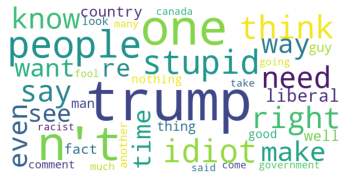

In [ ]:
text = ""
for ind, row in train.loc[train['toxic_binary']== 1].iterrows():
    text += str(row["clean_comment"]) + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Trump, stupid, idiot, racist etc. are the most common words in toxic comments. 

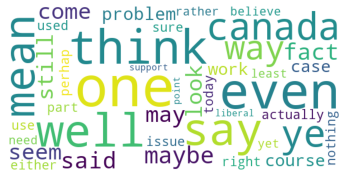

In [ ]:
text = ""
for ind, row in train.loc[train['sub_toxic'] == 'obscene'].iterrows():
    text += str(row["clean_comment"]) + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

one, canada, think, problem are some of the common words in sub-category obscene. 

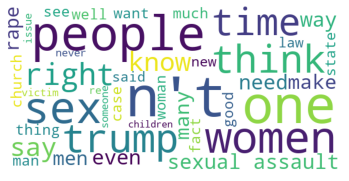

In [ ]:
text = ""
for ind, row in train.loc[train['sub_toxic'] == 'sexual_explicit'].iterrows():
    text += str(row["clean_comment"]) + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Trump, sex, victim, woman, rape, case are some of the most common words in sub-category sexual explicit.

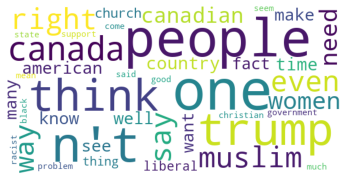

In [ ]:
text = ""
for ind, row in train.loc[train['sub_toxic'] == 'identity_attack'].iterrows():
    text += str(row["clean_comment"]) + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

people, muslim, trump, canada, christian are some of the most common words in sub-category identity attack.

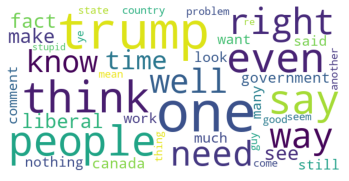

In [ ]:
text = ""
for ind, row in train.loc[train['sub_toxic'] == 'insult'].iterrows():
    text += str(row["clean_comment"]) + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Trump, Canada, liberal, government are some of the most common words in sub-category insult.

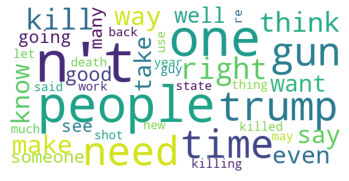

In [ ]:
text = ""
for ind, row in train.loc[train['sub_toxic'] == 'threat'].iterrows():
    text += str(row["clean_comment"]) + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Trump, death, kill, gun are some of the most common words in sub-category threat.

#Distribution of toxic category:- rating

In [ ]:
toxic_df = train.loc[train['toxic_binary']==1]

In [ ]:
toxic_df = toxic_df.reset_index(drop=True)
toxic_df.head(5)

,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count,toxic_binary,sub_toxic
0,650904,Mad dog will surely put the liberals in mental...,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76,1,insult
1,5902188,And Trump continues his lifelong cowardice by ...,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63,1,insult
2,5410943,Tucker and Paul are both total bad ass mofo's.,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,0,1,0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80,1,insult
3,5764010,I really wish the DP would bounce people tryin...,2017-08-14 09:02:12.901217+00,102,NaN,366182,approved,0,0,0,2,2,0.525000,0.012500,0.037500,0.000000,0.100000,0.462500,0.062500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80,1,insult
4,5167187,That's right. They are not normal. And I am st...,2017-04-23 05:37:53.975562+00,21,5166939.0,328935,rejected,0,0,0,0,0,0.803279,0.065574,0.049180,0.081967,0.131148,0.754098,0.016393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,61,1,insult


In [ ]:
toxic_df['rating'].value_counts()

approved    80392
rejected    26046
Name: rating, dtype: int64

Text(0, 0.5, 'Frequency')

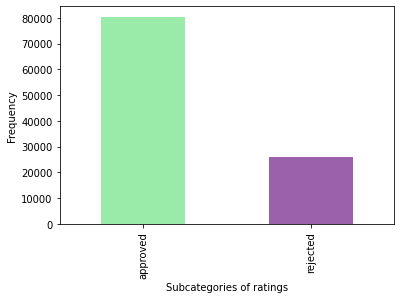

In [ ]:
rating_plot = toxic_df['rating'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])
rating_plot.set_xlabel('Subcategories of ratings')
rating_plot.set_ylabel('Frequency')

There are quite less toxic comments which are rejected.

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['rating'].value_counts())

insult
approved    64681
rejected    20378
Name: rating, dtype: int64
obscene
approved    4935
rejected    1692
Name: rating, dtype: int64
sexual_explicit
approved    1938
rejected     777
Name: rating, dtype: int64
threat
approved    2579
rejected     875
Name: rating, dtype: int64
identity_attack
approved    6259
rejected    2324
Name: rating, dtype: int64


Sexual explicit has high rejection rate which other sub-category have fairly low rejection rate. This may imply that sexual explicit comments are easy to identify while others are not. 

Text(0, 0.5, 'Frequency')

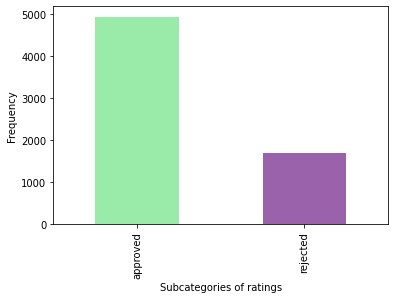

In [ ]:
rating_plot2 = toxic_df.loc[toxic_df['sub_toxic']=='obscene']['rating'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])
rating_plot2.set_xlabel('Subcategories of ratings')
rating_plot2.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

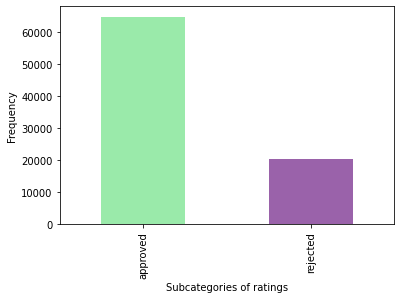

In [ ]:
rating_plot3 = toxic_df.loc[toxic_df['sub_toxic']=='insult']['rating'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])
rating_plot3.set_xlabel('Subcategories of ratings')
rating_plot3.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

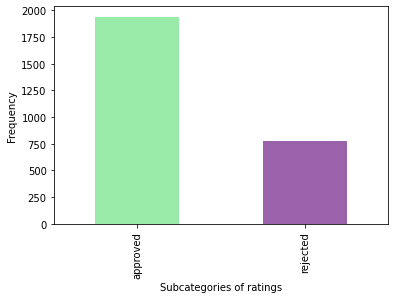

In [ ]:
rating_plot4 = toxic_df.loc[toxic_df['sub_toxic']=='sexual_explicit']['rating'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])
rating_plot4.set_xlabel('Subcategories of ratings')
rating_plot4.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

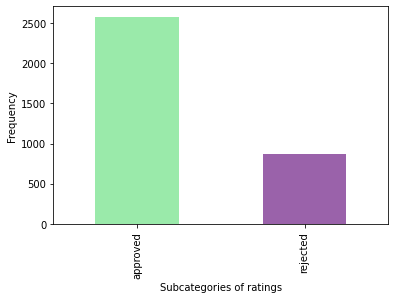

In [ ]:
rating_plot5 = toxic_df.loc[toxic_df['sub_toxic']=='threat']['rating'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])
rating_plot5.set_xlabel('Subcategories of ratings')
rating_plot5.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

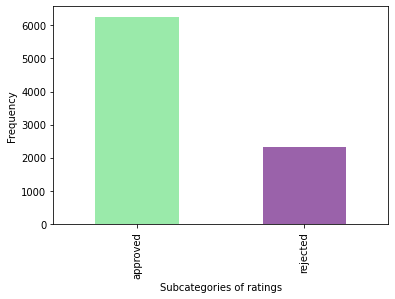

In [ ]:
rating_plot6 = toxic_df.loc[toxic_df['sub_toxic']=='identity_attack']['rating'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])
rating_plot6.set_xlabel('Subcategories of ratings')
rating_plot6.set_ylabel('Frequency')

#Distribution of toxic category:- funny, wow, sad, likes, disagree

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['funny'].value_counts())

insult
0     73395
1      7486
2      2348
3       926
4       390
5       202
6       133
7        53
8        35
9        27
10       20
12        8
14        7
11        5
16        4
13        4
15        2
23        2
19        2
17        2
32        1
20        1
18        1
24        1
22        1
58        1
31        1
95        1
Name: funny, dtype: int64
obscene
0     5778
1      527
2      169
3       58
4       33
6       14
7       13
5       11
8        9
9        5
11       3
13       2
10       2
24       1
22       1
14       1
Name: funny, dtype: int64
sexual_explicit
0     2307
1      225
2       85
3       33
4       26
5       15
7       11
6        7
9        2
13       1
12       1
30       1
10       1
Name: funny, dtype: int64
threat
0     2968
1      286
2       94
3       44
4       27
5       10
6        7
8        7
7        3
16       2
11       2
9        1
35       1
14       1
19       1
Name: funny, dtype: int64
identity_attack
0     7460
1      719


Insult category has the highest funny reactions which may imply that sometimes insult comments may contain humor. People don't find other toxic sub-categories to be hilarious.  

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['wow'].value_counts())

insult
0    81716
1     2909
2      348
3       66
4       17
5        1
6        1
7        1
Name: wow, dtype: int64
obscene
0    6430
1     166
2      18
3      10
4       2
5       1
Name: wow, dtype: int64
sexual_explicit
0    2600
1      94
2      16
3       3
4       2
Name: wow, dtype: int64
threat
0    3232
1     186
2      27
3       8
4       1
Name: wow, dtype: int64
identity_attack
0    8143
1     360
2      61
3      14
4       3
6       1
5       1
Name: wow, dtype: int64


All the sub-categories have fairly low 'wow' reactions which may imply that people don't correlate these comments positively. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['sad'].value_counts())

insult
0     77959
1      5313
2      1188
3       330
4       139
5        66
6        37
7         9
8         6
9         6
14        3
10        2
13        1
Name: sad, dtype: int64
obscene
0     6192
1      335
2       69
3       22
5        4
8        2
6        1
16       1
4        1
Name: sad, dtype: int64
sexual_explicit
0    2520
1     158
2      21
3      11
5       4
4       1
Name: sad, dtype: int64
threat
0    3173
1     211
2      43
3      18
4       7
5       2
Name: sad, dtype: int64
identity_attack
0     7709
1      651
2      143
3       48
4       11
5        9
7        4
6        4
8        3
10       1
Name: sad, dtype: int64


Again, all the sub-categories have fairly low sad reactions which may imply people don't like to react to toxic comments. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['likes'].value_counts())

insult
0      38195
1      13619
2       8466
3       5880
4       4213
       ...  
94         1
89         1
72         1
88         1
110        1
Name: likes, Length: 91, dtype: int64
obscene
0     3434
1     1030
2      608
3      407
4      271
5      203
6      146
7       99
8       93
9       58
10      35
13      30
12      29
11      26
15      25
14      20
18      14
21      10
19      10
16       9
22       9
20       8
17       8
25       7
23       5
24       4
26       4
35       4
27       3
28       3
34       2
73       2
59       1
40       1
50       1
32       1
55       1
47       1
58       1
53       1
54       1
31       1
39       1
Name: likes, dtype: int64
sexual_explicit
0     1420
1      445
2      271
3      166
4       93
5       70
6       49
7       41
8       34
9       23
11      20
10      17
12      12
13       8
14       6
18       5
16       5
15       5
17       4
34       4
20       3
21       3
19       3
24       2
23       2
25       1
27 

It is surprising to see so many likes for toxic comments which is lead by insult sub-category. All the sub-categories have fairly amount of likes which means some or the person person may have agreed to the toxic comment which honestly is disturbing. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['disagree'].value_counts())

insult
0     64232
1      9851
2      4480
3      2286
4      1362
5       855
6       555
7       366
8       268
9       174
10      132
11       99
12       79
13       63
14       44
15       32
17       26
16       25
19       17
18       15
22       10
23        9
24        8
25        6
20        6
26        6
21        6
27        5
36        4
29        4
30        4
35        4
38        3
28        2
33        2
48        2
49        2
31        2
44        2
34        2
42        1
96        1
51        1
37        1
53        1
72        1
32        1
40        1
83        1
Name: disagree, dtype: int64
obscene
0     5553
1      555
2      227
3      111
4       59
5       34
7       21
6       19
9       12
8       10
10      10
11       5
13       3
21       3
14       2
43       1
31       1
39       1
Name: disagree, dtype: int64
sexual_explicit
0     2238
1      254
2       99
3       50
4       24
6       13
5       13
7        5
11       5
14       3
9        3
8   

The disagreement on the toxic comments is fairly lower than likes which shows that people don't like to show disagreement publicly to toxic comments. 

#Distribution of toxic category:- Gender

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['male'].value_counts())

insult
0.000000    16134
1.000000     1176
0.166667      679
0.100000      576
0.200000      574
0.833333      324
0.800000      310
0.500000      294
0.300000      272
0.700000      258
0.600000      246
0.400000      224
0.250000      113
0.750000       92
0.900000       67
0.666667       29
0.333333       29
0.857143        6
0.111111        5
0.142857        3
0.090909        3
0.888889        2
0.363636        2
0.125000        2
0.181818        2
0.070826        1
0.045931        1
0.001122        1
0.013906        1
0.009050        1
0.016921        1
0.126984        1
0.003245        1
0.545455        1
0.954545        1
0.972944        1
0.001900        1
0.727273        1
0.039612        1
0.017744        1
0.156000        1
0.714286        1
Name: male, dtype: int64
obscene
0.000000    1182
1.000000      88
0.166667      44
0.100000      31
0.200000      29
0.833333      23
0.800000      22
0.500000      21
0.300000      19
0.600000      16
0.400000      13
0.700000      13


Male gender is not much targeted in the toxic comments. In the given data, sexual explicit sub-category seems to have highest ratio among all the categories. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['female'].value_counts())

insult
0.000000    16828
1.000000     1768
0.166667      393
0.833333      375
0.200000      352
0.800000      302
0.100000      278
0.400000      214
0.300000      207
0.500000      184
0.600000      162
0.700000      152
0.900000       98
0.250000       35
0.750000       34
0.333333       12
0.666667        8
0.111111        7
0.857143        6
0.142857        3
0.636364        2
0.454545        1
0.987718        1
0.125000        1
0.875000        1
0.001122        1
0.913401        1
0.818182        1
0.002248        1
0.090909        1
0.004029        1
0.545455        1
0.079365        1
0.181818        1
0.004785        1
0.952922        1
0.001267        1
0.777778        1
0.004000        1
0.363636        1
Name: female, dtype: int64
obscene
0.000000    1131
1.000000     136
0.166667      45
0.200000      33
0.400000      29
0.800000      26
0.300000      24
0.100000      21
0.833333      18
0.500000      14
0.700000      13
0.600000      11
0.250000       8
0.750000       5


Sexual explicit sub-category has highest ratio among all. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['homosexual_gay_or_lesbian'].value_counts())

insult
0.000000    20563
1.000000      225
0.800000       80
0.100000       76
0.166667       66
0.833333       66
0.600000       60
0.300000       58
0.200000       57
0.700000       51
0.500000       44
0.400000       43
0.900000       37
0.250000        2
0.002596        1
0.111111        1
0.974018        1
0.001082        1
0.021531        1
0.984127        1
0.272727        1
0.008994        1
0.750000        1
0.090909        1
0.000646        1
Name: homosexual_gay_or_lesbian, dtype: int64
obscene
0.000000    1478
0.100000      10
1.000000       7
0.166667       5
0.200000       4
0.600000       4
0.800000       4
0.300000       3
0.500000       2
0.833333       1
0.700000       1
0.001661       1
0.900000       1
0.727273       1
Name: homosexual_gay_or_lesbian, dtype: int64
sexual_explicit
0.000000    1114
1.000000      63
0.800000      16
0.100000      16
0.833333      13
0.900000      11
0.700000      10
0.200000       8
0.166667       7
0.400000       5
0.600000       4
0.

Identity attack has highest ratio sub-category toxicity. So, sexual explicit and identity attack seem to be high in the case of gender features. 

#Distribution of toxic category:- Religion

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['muslim'].value_counts())

insult
0.000000    20084
1.000000      565
0.833333      110
0.800000       95
0.500000       85
0.200000       69
0.900000       62
0.166667       60
0.600000       58
0.400000       57
0.300000       57
0.700000       53
0.100000       47
0.750000       16
0.250000       11
0.333333        3
0.000649        1
0.955640        1
0.632679        1
0.984127        1
0.994359        1
0.666667        1
0.001122        1
Name: muslim, dtype: int64
obscene
0.000000    1467
1.000000      31
0.166667       5
0.800000       4
0.833333       2
0.200000       2
0.100000       2
0.900000       2
0.250000       2
0.545455       1
0.700000       1
0.400000       1
0.600000       1
0.300000       1
Name: muslim, dtype: int64
sexual_explicit
0.000000    1249
1.000000      10
0.100000       4
0.166667       2
0.700000       2
0.900000       2
0.800000       2
0.400000       1
0.833333       1
0.200000       1
0.000643       1
0.300000       1
Name: muslim, dtype: int64
threat
0.000000    664
1.000000 

All the sub-categories are low but identity attack seems to have highest ratio. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['hindu'].value_counts())

insult
0.000000    21368
0.100000       26
0.166667        9
0.200000        6
0.500000        4
0.250000        4
0.800000        4
1.000000        3
0.700000        3
0.750000        2
0.833333        2
0.900000        1
0.400000        1
0.000632        1
0.000633        1
0.600000        1
0.300000        1
0.000634        1
0.000646        1
Name: hindu, dtype: int64
obscene
0.0    1517
0.1       3
1.0       1
0.5       1
Name: hindu, dtype: int64
sexual_explicit
0.000000    1273
0.100000       2
0.000643       1
Name: hindu, dtype: int64
threat
0.0    713
0.1      1
Name: hindu, dtype: int64
identity_attack
0.000000    7592
0.100000      14
1.000000       6
0.250000       6
0.166667       5
0.750000       4
0.600000       3
0.300000       2
0.500000       2
0.400000       2
0.003236       1
0.001119       1
0.000550       1
0.001102       1
0.200000       1
0.000796       1
0.000562       1
0.800000       1
0.001088       1
0.000557       1
0.700000       1
0.000558       1
Name:

There is not much toxicity against Hindu's.

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['christian'].value_counts())

insult
0.000000    19647
1.000000      545
0.166667      148
0.300000      136
0.833333      127
0.200000      124
0.100000      122
0.400000      113
0.800000      111
0.500000       95
0.600000       90
0.700000       79
0.900000       43
0.250000       22
0.750000       15
0.666667        4
0.333333        3
0.888889        2
0.285714        2
0.000546        1
0.063348        1
0.454545        1
0.000806        1
0.636364        1
0.000649        1
0.001595        1
0.971501        1
0.002425        1
0.000634        1
0.363636        1
Name: christian, dtype: int64
obscene
0.000000    1422
1.000000      25
0.200000      14
0.800000      11
0.166667      10
0.300000       7
0.833333       6
0.600000       5
0.500000       5
0.700000       5
0.100000       5
0.400000       5
0.900000       1
0.250000       1
Name: christian, dtype: int64
sexual_explicit
0.000000    1106
1.000000      34
0.300000      19
0.200000      18
0.400000      15
0.700000      14
0.166667      13
0.833333    

All the sub-categories are low but identity attack and insult have better ratios. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['buddhist'].value_counts())

insult
0.000000    21387
0.100000       16
0.166667       12
0.250000        4
0.500000        4
1.000000        4
0.700000        3
0.004000        1
0.900000        1
0.800000        1
0.600000        1
0.090909        1
0.300000        1
0.000632        1
0.750000        1
0.200000        1
Name: buddhist, dtype: int64
obscene
0.000000    1516
0.100000       2
0.166667       2
0.500000       1
0.250000       1
Name: buddhist, dtype: int64
sexual_explicit
0.0    1276
Name: buddhist, dtype: int64
threat
0.0    713
0.1      1
Name: buddhist, dtype: int64
identity_attack
0.000000    7606
0.500000       8
1.000000       5
0.100000       4
0.250000       4
0.600000       3
0.833333       2
0.750000       2
0.400000       2
0.800000       2
0.333333       1
0.700000       1
0.300000       1
0.166667       1
0.666667       1
0.200000       1
0.955414       1
0.001104       1
0.000559       1
0.001942       1
Name: buddhist, dtype: int64


There is not much toxicity against buddhists. 

#Distribution of toxic category:- Color

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['black'].value_counts())

insult
0.000000    20082
1.000000      512
0.800000      129
0.833333      127
0.100000       90
0.700000       73
0.500000       72
0.600000       69
0.166667       57
0.400000       45
0.200000       42
0.900000       36
0.300000       34
0.750000       32
0.250000       17
0.666667        6
0.333333        5
0.857143        2
0.090909        1
0.001612        1
0.000797        1
0.976000        1
0.888889        1
0.005066        1
0.285714        1
0.005191        1
0.000561        1
Name: black, dtype: int64
obscene
0.000000    1448
1.000000      35
0.400000       6
0.166667       6
0.500000       5
0.800000       4
0.700000       3
0.750000       3
0.900000       2
0.600000       2
0.100000       2
0.833333       2
0.300000       2
0.666667       1
0.200000       1
Name: black, dtype: int64
sexual_explicit
0.000000    1241
1.000000      11
0.100000       5
0.400000       4
0.166667       4
0.800000       3
0.500000       2
0.600000       2
0.200000       1
0.700000       1
0.0006

All the sub-categories are low but identity attack seems to have highest ratio. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['white'].value_counts())

insult
0.000000    18957
1.000000     1090
0.800000      270
0.833333      252
0.700000      157
0.600000      110
0.900000      101
0.100000       94
0.500000       93
0.166667       90
0.400000       58
0.200000       53
0.300000       52
0.750000       27
0.666667        9
0.250000        7
0.888889        3
0.857143        3
0.333333        2
0.972000        1
0.989617        1
0.001617        1
0.454545        1
0.870804        1
0.000797        1
0.222222        1
0.002183        1
0.714286        1
0.975020        1
0.272727        1
Name: white, dtype: int64
obscene
0.000000    1422
1.000000      47
0.800000       8
0.833333       8
0.700000       6
0.166667       5
0.900000       5
0.500000       4
0.300000       4
0.200000       4
0.600000       3
0.000554       1
0.400000       1
0.250000       1
0.181818       1
0.100000       1
0.666667       1
Name: white, dtype: int64
sexual_explicit
0.000000    1221
1.000000      17
0.800000       8
0.833333       7
0.300000       4
0.1

Surprisingly, all the sub-categories are low but identity attack seems to have highest ratio even for whites.

#Distribution of toxic category:- Disability

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['physical_disability'].value_counts())

insult
0.000000    21212
0.100000       95
0.166667       54
0.200000       47
0.300000       15
0.400000        4
0.250000        3
0.090909        2
0.000633        1
0.001623        1
0.001092        1
0.142857        1
0.000632        1
0.007291        1
1.000000        1
Name: physical_disability, dtype: int64
obscene
0.000000    1513
0.100000       4
0.200000       3
0.000554       1
0.166667       1
Name: physical_disability, dtype: int64
sexual_explicit
0.000000    1261
0.166667       6
0.100000       6
0.300000       3
Name: physical_disability, dtype: int64
threat
0.000000    708
0.200000      2
0.166667      2
0.100000      2
Name: physical_disability, dtype: int64
identity_attack
0.000000    7588
0.100000      27
0.166667      12
0.200000      11
0.300000       4
0.400000       2
0.500000       1
0.000796       1
0.001100       1
0.000559       1
Name: physical_disability, dtype: int64


There is not much toxicity against physical disability. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['intellectual_or_learning_disability'].value_counts())

insult
0.000000    20813
0.100000      266
0.166667      232
0.200000       84
0.300000       19
0.250000        7
0.400000        3
0.142857        3
0.111111        2
0.003275        1
0.001293        1
0.014021        1
0.090909        1
0.002533        1
0.002392        1
0.000541        1
0.500000        1
0.181818        1
0.700000        1
Name: intellectual_or_learning_disability, dtype: int64
obscene
0.000000    1515
0.100000       3
0.166667       1
0.200000       1
0.090909       1
0.142857       1
Name: intellectual_or_learning_disability, dtype: int64
sexual_explicit
0.000000    1271
0.100000       2
0.166667       2
0.000643       1
Name: intellectual_or_learning_disability, dtype: int64
threat
0.000000    713
0.166667      1
Name: intellectual_or_learning_disability, dtype: int64
identity_attack
0.000000    7611
0.100000      22
0.166667       5
0.200000       4
0.000544       1
0.000551       1
0.400000       1
0.001104       1
0.000550       1
0.000559       1
Name: in

There is not much toxicity against intellectual or learning disability. 

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['psychiatric_or_mental_illness'].value_counts())


insult
0.000000    19882
0.166667      262
0.100000      195
0.200000      165
1.000000      141
0.600000      131
0.400000      129
0.500000      118
0.300000      117
0.800000       96
0.833333       91
0.700000       88
0.900000        6
0.142857        3
0.250000        2
0.454545        2
0.090909        1
0.000562        1
0.000806        1
0.857143        1
0.888889        1
0.000546        1
0.000797        1
0.037338        1
0.000633        1
0.272727        1
0.756029        1
Name: psychiatric_or_mental_illness, dtype: int64
obscene
0.000000    1494
0.100000       8
0.166667       4
0.800000       3
0.300000       3
0.600000       2
0.833333       2
1.000000       2
0.400000       1
0.200000       1
0.700000       1
0.500000       1
Name: psychiatric_or_mental_illness, dtype: int64
sexual_explicit
0.000000    1251
0.100000       8
0.166667       7
1.000000       2
0.300000       2
0.600000       2
0.200000       2
0.500000       1
0.800000       1
Name: psychiatric_or_menta

There is not much toxicity but identity attack seems to have some number which may be due to the fact that people call each other stupid and stuff. 

#Distribution of toxic category:- Comments

In [ ]:
for jj in toxic_df['sub_toxic'].unique():
      print('*' * 100)
      print(jj)
      print(toxic_df.loc[toxic_df['sub_toxic']==jj]['comment_text'].value_counts())


****************************************************************************************************
insult
H.L. MENCKEN’S prediction:\n\n“As democracy is perfected, the office of the President represents, more and more closely, the inner soul of the people. On some great and glorious day, the plain folks of the Land will reach their heart’s desire at last, and the White House will be occupied by a downright fool and complete narcissist moron.”\n\n  -H.L. Mencken\nThe Baltimore Evening Sun,\nJuly 26, 1920                                                                                                                                                                                                                                                                                                                                                                                  26
Nicky, you can't handle the truth. Both Harper and Harris were completely useless scumbags. One was the worst PM we w

- Insult:- It contains words which are considered vulgar and meant to hurt other people. 
- Obscene: - It contains much higher level of vulgar words along with nasty remarks against people.
- Sexual explicit:- It contains words mostly related to sex and sexual parts.
- Threat:- Killing and making threats to cause damage are frequent in this sub-category.
- Identity attack:- It contains sentences which are derogatory against identities and preferences of people. 
